In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
df1= pd.read_csv('Chicago_Crimes_2005_to_2007.csv', on_bad_lines='skip')
df2=pd.read_csv('Chicago_Crimes_2008_to_2011.csv',on_bad_lines='skip')
df3=pd.read_csv('Chicago_Crimes_2012_to_2017.csv',on_bad_lines='skip')

In [3]:
df1.shape

(1872343, 23)

In [4]:
df2.shape

(2688710, 23)

In [5]:
df3.shape

(1456714, 23)

In [6]:
df=pd.concat([df1,df2,df3])

In [7]:
df.shape

(6017767, 23)

In [8]:
df.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
5,6,4673631,HM263167,03/30/2006 10:30:00 PM,014XX W 73RD PL,0560,ASSAULT,SIMPLE,APARTMENT,True,...,17.0,67.0,08A,1167688.0,1855998.0,2006,04/15/2016 08:55:02 AM,41.760401,-87.660982,"(41.760401372, -87.660982392)"
6,7,4673632,HM273234,04/05/2006 12:10:00 PM,050XX N LARAMIE AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,...,45.0,11.0,08B,1140791.0,1932993.0,2006,04/15/2016 08:55:02 AM,41.972221,-87.757670,"(41.972220564, -87.75766982)"
7,8,4673633,HM275105,04/05/2006 03:00:00 PM,067XX S ROCKWELL ST,0820,THEFT,$500 AND UNDER,STREET,False,...,15.0,66.0,06,1160205.0,1859776.0,2006,04/15/2016 08:55:02 AM,41.770926,-87.688304,"(41.770925978, -87.688304107)"
8,9,4673634,HM275063,04/05/2006 09:30:00 PM,019XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,...,32.0,24.0,08A,1163122.0,1905349.0,2006,04/15/2016 08:55:02 AM,41.895923,-87.676334,"(41.895922672, -87.676333733)"
9,10,4673635,HM268513,04/03/2006 03:00:00 AM,063XX S EBERHART AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,20.0,42.0,08B,1180669.0,1863047.0,2006,04/15/2016 08:55:02 AM,41.779456,-87.613191,"(41.77945628, -87.613190628)"


In [9]:
df.tail(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456704,6249417,10508666,HZ250497,05/03/2016 11:30:00 PM,053XX S PULASKI RD,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,...,23.0,62.0,03,1150606.0,1868988.0,2016,05/10/2016 03:56:50 PM,41.796397,-87.723251,"(41.79639731, -87.723251281)"
1456705,6249592,10508671,HZ250526,05/03/2016 11:50:00 PM,036XX E 106TH ST,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,ALLEY,True,...,10.0,52.0,26,1202327.0,1835278.0,2016,05/10/2016 03:56:50 PM,41.702731,-87.534736,"(41.702731182, -87.534736413)"
1456706,6249615,10508672,HZ250441,05/03/2016 10:25:00 PM,071XX S MOZART ST,0460,BATTERY,SIMPLE,SIDEWALK,True,...,18.0,66.0,08B,1158610.0,1857066.0,2016,05/10/2016 03:56:50 PM,41.763522,-87.694225,"(41.763522012, -87.69422464)"
1456707,6249936,10508675,HZ250502,05/03/2016 11:00:00 PM,085XX S MAY ST,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,...,21.0,71.0,03,1170146.0,1848113.0,2016,05/10/2016 03:56:50 PM,41.738711,-87.652203,"(41.738710803, -87.652202523)"
1456708,6250154,10508678,HZ250481,05/03/2016 11:28:00 PM,088XX S LAFLIN ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,21.0,71.0,04B,1167880.0,1846134.0,2016,05/10/2016 03:56:50 PM,41.733329,-87.660561,"(41.733329054, -87.660561367)"
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


<Axes: >

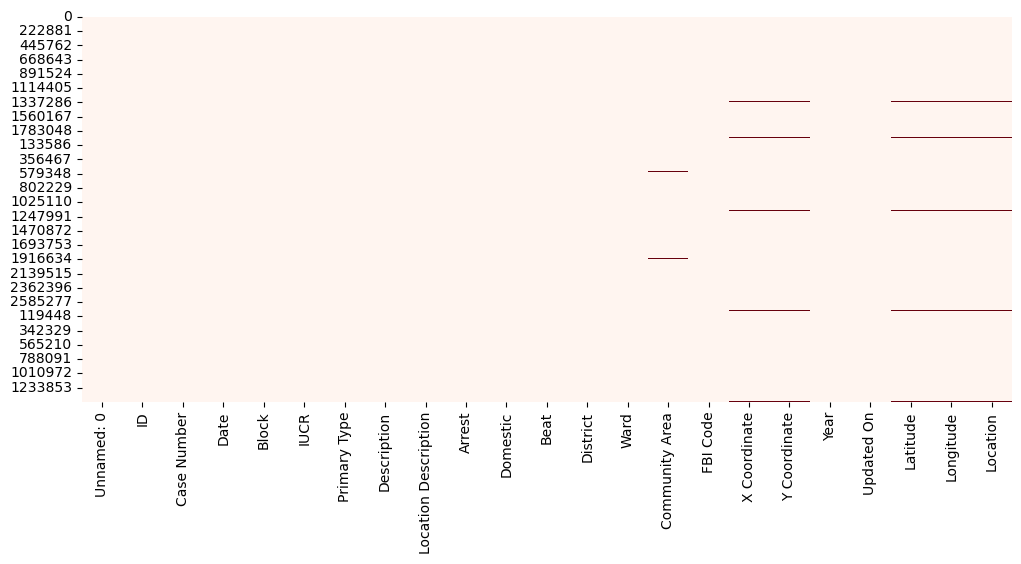

In [14]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')  # Use 'Reds' for a red color map

In [18]:
df.drop(['Unnamed: 0','Case Number','ID','IUCR','X Coordinate','Y Coordinate','Updated On','Year','FBI Code','Beat','Ward','Community Area','Location','District','Latitude','Longitude'],inplace=True,axis=1)

In [20]:
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


In [24]:
df.Date=pd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p")

In [26]:
df.Date 

0         2006-04-02 13:00:00
1         2006-02-26 13:40:48
2         2006-01-08 23:16:00
3         2006-04-05 18:45:00
4         2006-02-17 21:03:14
                  ...        
1456709   2016-05-03 23:33:00
1456710   2016-05-03 23:30:00
1456711   2016-05-03 00:15:00
1456712   2016-05-03 21:07:00
1456713   2016-05-03 23:38:00
Name: Date, Length: 6017767, dtype: datetime64[ns]

In [253]:
df.index=pd.DatetimeIndex(df.index)

In [300]:
df.resample('Y').size()

C:\Users\PARAS\AppData\Local\Temp\ipykernel_27952\2465074692.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample('Y').size()


1970-12-31    849982
Freq: YE-DEC, dtype: int64

In [302]:
df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
1970-01-01 00:00:00.000000000,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1970-01-01 00:00:00.000000001,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
1970-01-01 00:00:00.000000002,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
1970-01-01 00:00:00.000000003,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
1970-01-01 00:00:00.000000004,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000849977,2008-10-05 08:32:00,030XX W JACKSON BLVD,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False
1970-01-01 00:00:00.000849978,2008-10-06 00:01:00,103XX S AVENUE M,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False
1970-01-01 00:00:00.000849979,2008-10-05 22:32:00,071XX S WOODLAWN AVE,HOMICIDE,FIRST DEGREE MURDER,CTA BUS,True,False
1970-01-01 00:00:00.000849980,2008-10-06 17:20:00,015XX S CHRISTIANA AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False


In [304]:
df['Primary Type'].value_counts()

Primary Type
BATTERY                             180570
NARCOTICS                           166470
THEFT                               109736
CRIMINAL DAMAGE                      82891
ASSAULT                              57056
OTHER OFFENSE                        50890
ROBBERY                              38787
CRIMINAL TRESPASS                    36357
BURGLARY                             32201
MOTOR VEHICLE THEFT                  20491
DECEPTIVE PRACTICE                   17862
WEAPONS VIOLATION                    13440
PROSTITUTION                         11214
PUBLIC PEACE VIOLATION                9905
GAMBLING                              3451
OFFENSE INVOLVING CHILDREN            3234
LIQUOR LAW VIOLATION                  2909
INTERFERENCE WITH PUBLIC OFFICER      2515
SEX OFFENSE                           2492
ARSON                                 2280
HOMICIDE                              2056
CRIM SEXUAL ASSAULT                   1808
KIDNAPPING                             61

In [306]:
order_data=df['Primary Type'].value_counts().iloc[:15].index

In [308]:
print(order_data.duplicated().sum())  # Count duplicate values
print(order_data[order_data.duplicated()])  # Show duplicate values

0
Index([], dtype='object', name='Primary Type')


In [310]:
order_data = order_data.drop_duplicates()

In [312]:
order_data = df['Primary Type'].drop_duplicates()

<Axes: xlabel='count', ylabel='Primary Type'>

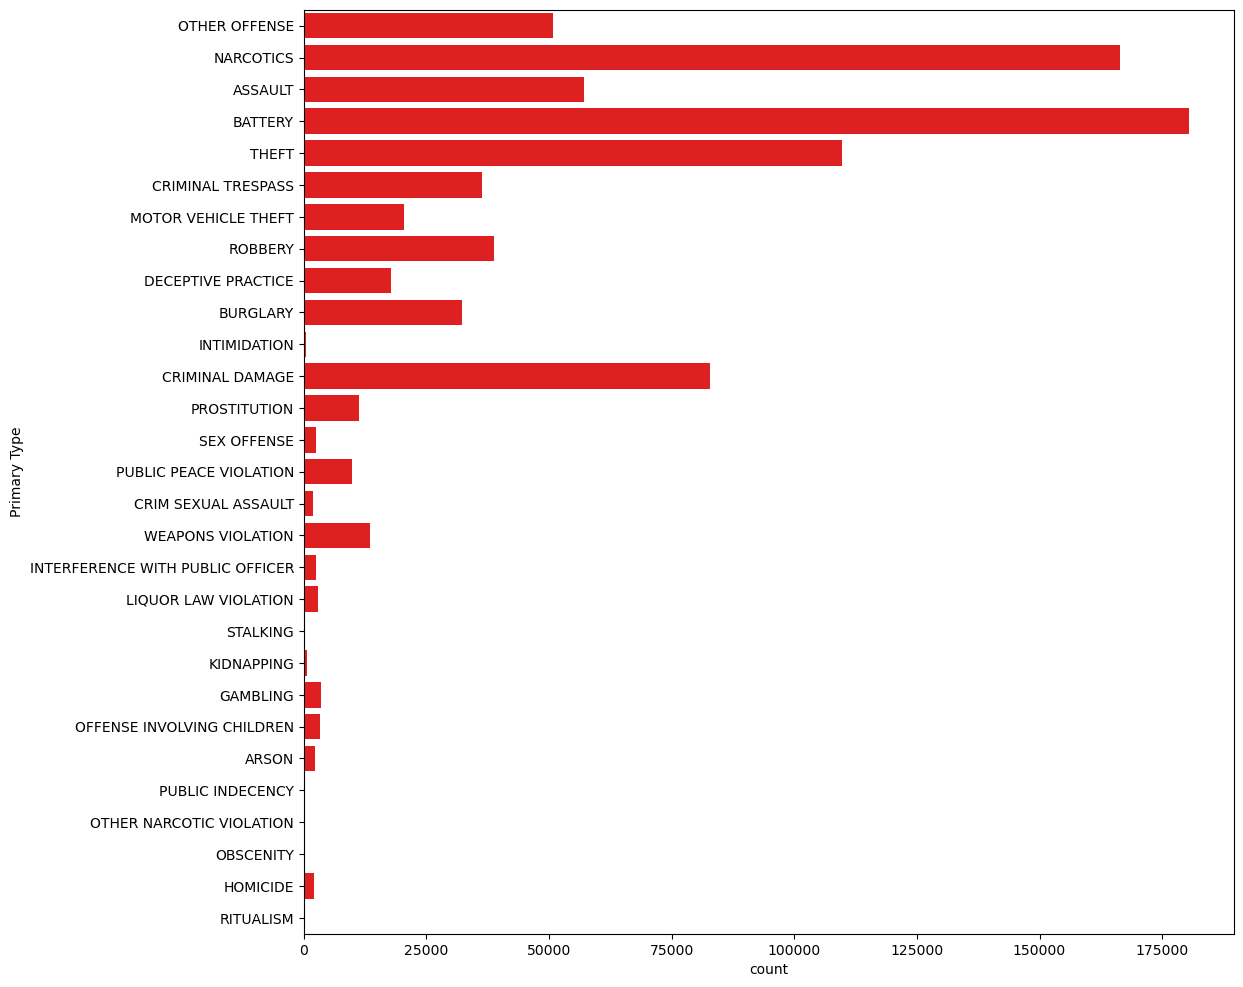

In [314]:
plt.figure(figsize=(12,12))
sns.countplot(y='Primary Type',data=df,order=order_data,color='Red')

In [315]:
#Location description

In [316]:
print(order_data.duplicated().sum())  # Count duplicate values
print(order_data[order_data.duplicated()])  # Show duplicate values

0
Series([], Name: Primary Type, dtype: object)


In [317]:
order_data = order_data.drop_duplicates()

In [322]:
order_data = df['Location Description'].drop_duplicates()

In [324]:
order_data = list(df['Location Description'].value_counts().index)

In [326]:
# This was the  error in here ValueError: cannot reindex on an axis with duplicate labels

In [328]:
print(df.index.duplicated().sum())  # Count duplicate index values
print(df[df.index.duplicated()])  # Show duplicate index values

0
Empty DataFrame
Columns: [Date, Block, Primary Type, Description, Location Description, Arrest, Domestic]
Index: []


In [330]:
df = df[~df.index.duplicated()]

In [332]:
print(df.columns.duplicated().sum())  # Count duplicate column names
print(df.loc[:, df.columns.duplicated()])  # Show duplicate column names

0
Empty DataFrame
Columns: []
Index: [1970-01-01 00:00:00, 1970-01-01 00:00:00.000000001, 1970-01-01 00:00:00.000000002, 1970-01-01 00:00:00.000000003, 1970-01-01 00:00:00.000000004, 1970-01-01 00:00:00.000000005, 1970-01-01 00:00:00.000000006, 1970-01-01 00:00:00.000000007, 1970-01-01 00:00:00.000000008, 1970-01-01 00:00:00.000000009, 1970-01-01 00:00:00.000000010, 1970-01-01 00:00:00.000000011, 1970-01-01 00:00:00.000000012, 1970-01-01 00:00:00.000000013, 1970-01-01 00:00:00.000000014, 1970-01-01 00:00:00.000000015, 1970-01-01 00:00:00.000000016, 1970-01-01 00:00:00.000000017, 1970-01-01 00:00:00.000000018, 1970-01-01 00:00:00.000000019, 1970-01-01 00:00:00.000000020, 1970-01-01 00:00:00.000000021, 1970-01-01 00:00:00.000000022, 1970-01-01 00:00:00.000000023, 1970-01-01 00:00:00.000000024, 1970-01-01 00:00:00.000000025, 1970-01-01 00:00:00.000000026, 1970-01-01 00:00:00.000000027, 1970-01-01 00:00:00.000000028, 1970-01-01 00:00:00.000000029, 1970-01-01 00:00:00.000000030, 1970-01-01 

In [334]:
df = df.reset_index(drop=True)

<Axes: xlabel='count', ylabel='Location Description'>

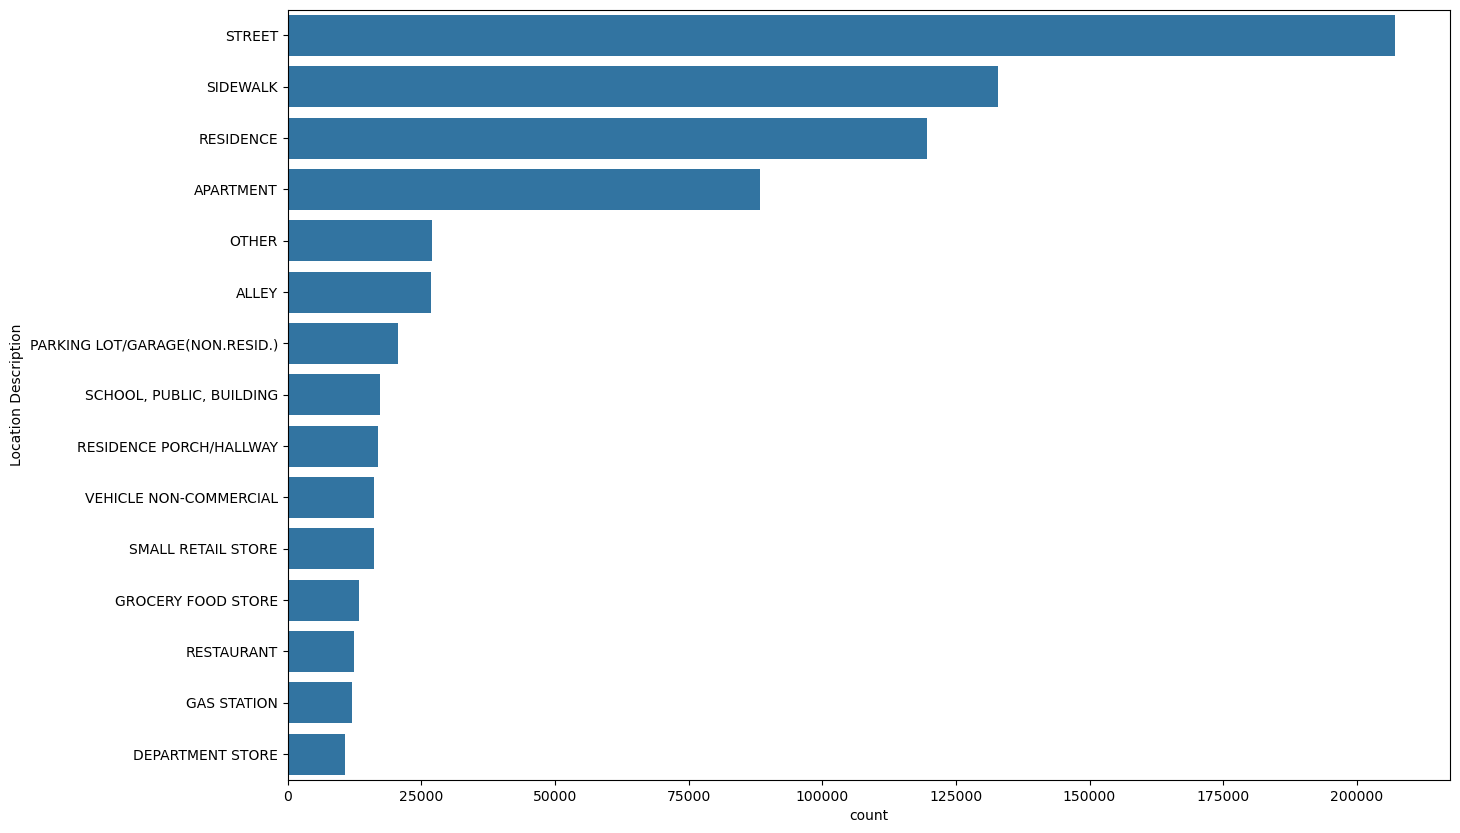

In [336]:
plt.figure(figsize =(15,10))
sns.countplot(y='Location Description',data=df,order=df['Location Description'].value_counts().iloc[:15].index)

In [337]:
df.index = pd.to_datetime(df.index)
df.resample('Y').size()

C:\Users\PARAS\AppData\Local\Temp\ipykernel_27952\3162053436.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample('Y').size()


1970-12-31    849982
Freq: YE-DEC, dtype: int64

In [352]:
df['Date'] = pd.to_datetime(df['Date'])  # Ensure the column is in datetime format
df.set_index('Date', inplace=True)  # Set it as the index
df.resample('Y').size()  # Resample by year and count entries

C:\Users\PARAS\AppData\Local\Temp\ipykernel_27952\2123436001.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample('Y').size()  # Resample by year and count entries


Date
2005-12-31    187977
2006-12-31    187420
2007-12-31    183634
2008-12-31       618
2009-12-31     36632
2010-12-31    129173
2011-12-31    124528
Freq: YE-DEC, dtype: int64

C:\Users\PARAS\AppData\Local\Temp\ipykernel_27952\1975906414.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(df.resample('Y').size())


Text(0, 0.5, 'Number of crimes that occured')

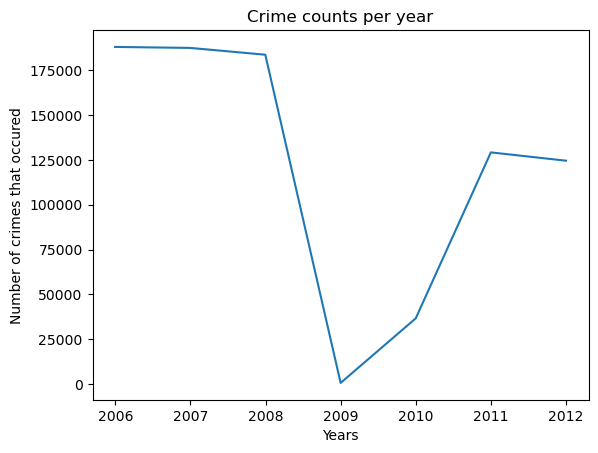

In [362]:
plt.plot(df.resample('Y').size())
plt.title('Crime counts per year')
plt.xlabel('Years')
plt.ylabel('Number of crimes that occured')

C:\Users\PARAS\AppData\Local\Temp\ipykernel_27952\3907354158.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(df.resample('M').size())


Text(0, 0.5, 'Number of crimes that occured')

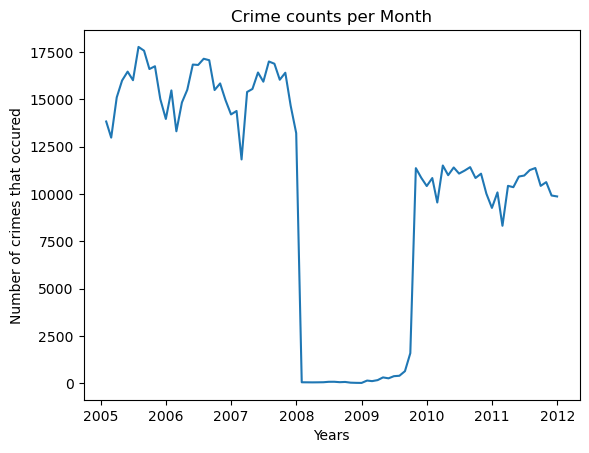

In [364]:
plt.plot(df.resample('M').size())
plt.title('Crime counts per Month')
plt.xlabel('Years')
plt.ylabel('Number of crimes that occured')

C:\Users\PARAS\AppData\Local\Temp\ipykernel_27952\3321046116.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  plt.plot(df.resample('Q').size())


Text(0, 0.5, 'Number of crimes that occured')

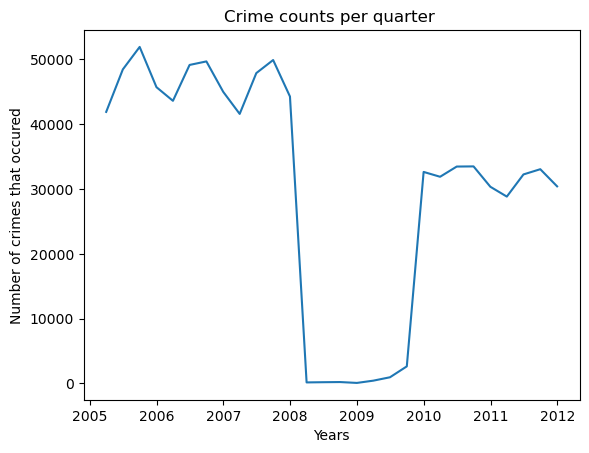

In [370]:
plt.plot(df.resample('Q').size())
plt.title('Crime counts per quarter ')
plt.xlabel('Years')
plt.ylabel('Number of crimes that occured')

In [372]:
#Preparing the DATA

In [374]:
df_prophets=df.resample('M').size().reset_index()

C:\Users\PARAS\AppData\Local\Temp\ipykernel_27952\2686724296.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_prophets=df.resample('M').size().reset_index()


In [376]:
df_prophets

,Date,0
0,2005-01-31,13824
1,2005-02-28,12973
2,2005-03-31,15098
3,2005-04-30,15989
4,2005-05-31,16458
...,...,...
79,2011-08-31,11368
80,2011-09-30,10425
81,2011-10-31,10623
82,2011-11-30,9916


In [388]:
df_prophets.columns=['Date','Crimes Counts']

In [390]:
df_prophets

,Date,Crimes Counts
0,2005-01-31,13824
1,2005-02-28,12973
2,2005-03-31,15098
3,2005-04-30,15989
4,2005-05-31,16458
...,...,...
79,2011-08-31,11368
80,2011-09-30,10425
81,2011-10-31,10623
82,2011-11-30,9916


In [396]:
df_prophets_df_final=df_prophets.rename(columns={'Date':'ds','Crimes Counts':'y'})

In [398]:
df_prophets_df_final

,ds,y
0,2005-01-31,13824
1,2005-02-28,12973
2,2005-03-31,15098
3,2005-04-30,15989
4,2005-05-31,16458
...,...,...
79,2011-08-31,11368
80,2011-09-30,10425
81,2011-10-31,10623
82,2011-11-30,9916


In [401]:
#Making the final  predictions

In [404]:
m=Prophet()
m.fit(df_prophets_df_final)


14:37:49 - cmdstanpy - INFO - Chain [1] start processing
14:37:49 - cmdstanpy - INFO - Chain [1] done processing


In [406]:
#Prediction of thefuture over here

In [422]:
future=m.make_future_dataframe(periods=720)
forecast=m.predict(future)

In [424]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,13460.428377,10109.684283,24135.991454,13460.428377,13460.428377,3537.391728,3537.391728,3537.391728,3537.391728,3537.391728,3537.391728,0.0,0.0,0.0,16997.820105
1,2005-02-28,13357.168322,4379.778655,18047.343474,13357.168322,13357.168322,-1841.655737,-1841.655737,-1841.655737,-1841.655737,-1841.655737,-1841.655737,0.0,0.0,0.0,11515.512585
2,2005-03-31,13242.844691,5822.956866,19435.688791,13242.844691,13242.844691,-359.097928,-359.097928,-359.097928,-359.097928,-359.097928,-359.097928,0.0,0.0,0.0,12883.746763
3,2005-04-30,13132.208918,6591.763816,20026.925529,13132.208918,13132.208918,540.304143,540.304143,540.304143,540.304143,540.304143,540.304143,0.0,0.0,0.0,13672.513061
4,2005-05-31,13017.885286,7948.870378,21589.721360,13017.885286,13017.885286,1483.239461,1483.239461,1483.239461,1483.239461,1483.239461,1483.239461,0.0,0.0,0.0,14501.124747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2013-12-16,1511.822527,-13823.361180,-107.835312,1511.682309,1511.960924,-8314.709714,-8314.709714,-8314.709714,-8314.709714,-8314.709714,-8314.709714,0.0,0.0,0.0,-6802.887187
800,2013-12-17,1508.136571,-11130.809669,2671.309097,1507.996161,1508.275205,-5718.882881,-5718.882881,-5718.882881,-5718.882881,-5718.882881,-5718.882881,0.0,0.0,0.0,-4210.746310
801,2013-12-18,1504.450616,-8807.500782,5378.458003,1504.309958,1504.589486,-2967.015368,-2967.015368,-2967.015368,-2967.015368,-2967.015368,-2967.015368,0.0,0.0,0.0,-1462.564752
802,2013-12-19,1500.764661,-5762.824430,8057.900231,1500.623737,1500.903754,-157.563904,-157.563904,-157.563904,-157.563904,-157.563904,-157.563904,0.0,0.0,0.0,1343.200757


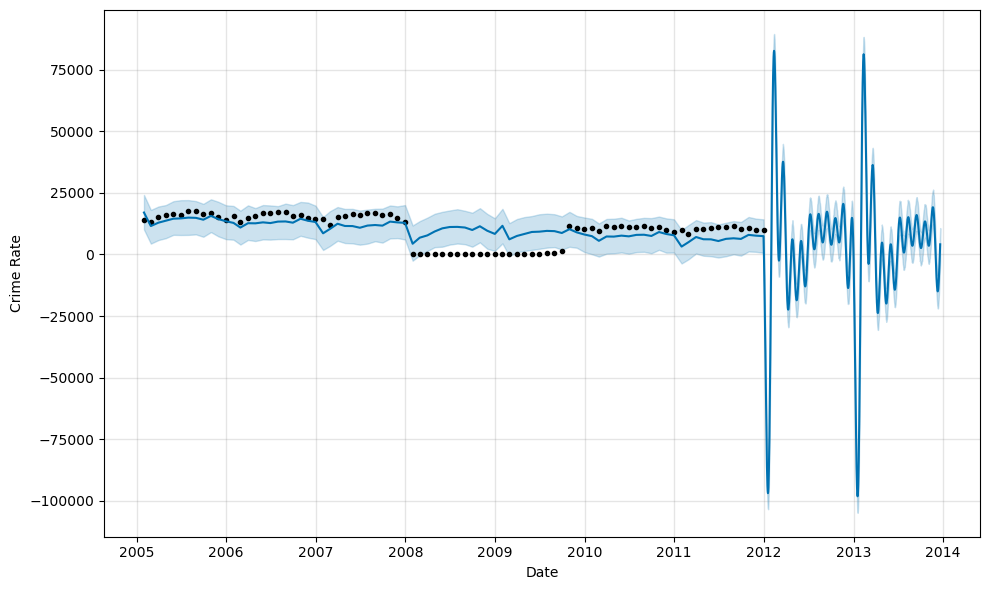

In [426]:
figure=m.plot(forecast,xlabel='Date',ylabel='Crime Rate')


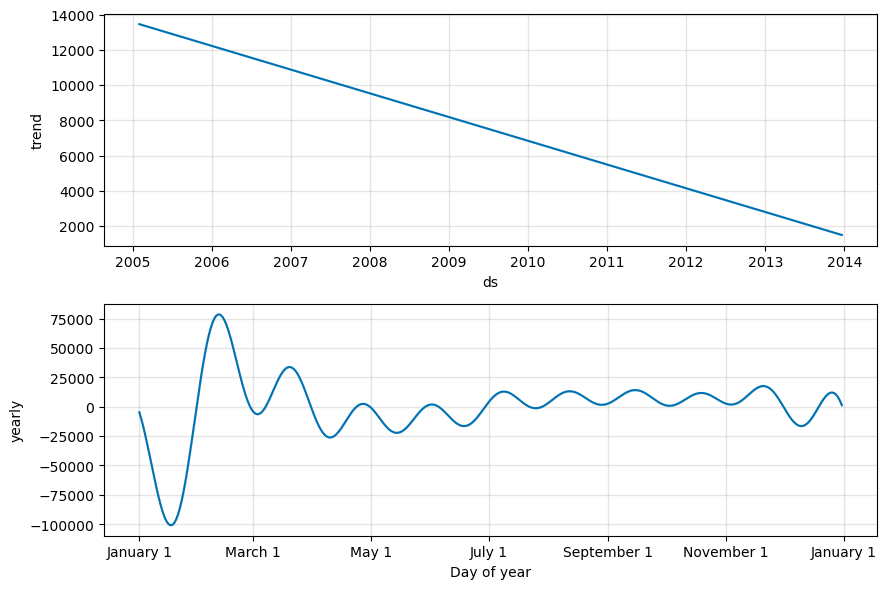

In [428]:
figure=m.plot_components(forecast)
